<a href="https://colab.research.google.com/github/nguyenphucloc22/test/blob/main/W5_6_3_23_Fuzzylogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=9537608069b0c1aec2c5114c38dfc7f5d7e760a899181d04050c35d1e9faf99a
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [7]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [8]:
setpoint = ctrl.Antecedent(np.arange(12,32.1,0.1),'setpoint')
sensor = ctrl.Antecedent(np.arange(-3,60.1,0.1),'sensor')
pwm = ctrl.Consequent(np.arange(0,256,1),'pwm')

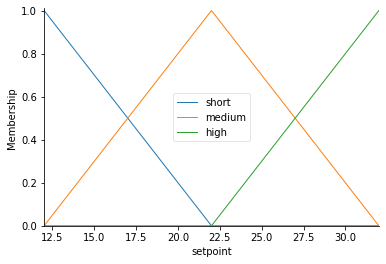

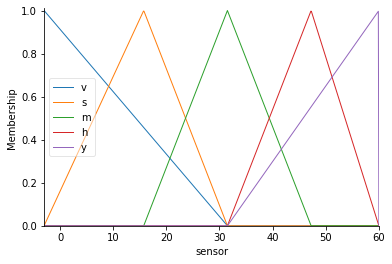

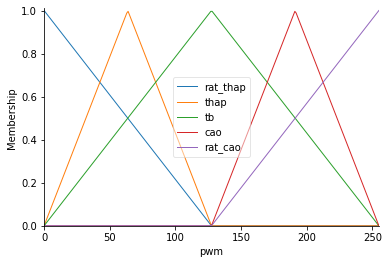

In [9]:
setpoint['short']=fuzz.trimf(setpoint.universe, [12,12,22])
setpoint['medium']=fuzz.trimf(setpoint.universe, [12,22,32])
setpoint['high']=fuzz.trimf(setpoint.universe, [22,32,32])

sensor['v']=fuzz.trimf(sensor.universe, [-3,-3,31.5])
sensor['s']=fuzz.trimf(sensor.universe, [-3,15.75,31.5])
sensor['m']=fuzz.trimf(sensor.universe, [15.75,31.5,47.25])
sensor['h']=fuzz.trimf(sensor.universe, [31.5,47.25,60])
sensor['y']=fuzz.trimf(sensor.universe, [31.5,60,60])

pwm['rat_thap']=fuzz.trimf(pwm.universe, [0,0,255/2])
pwm['thap']=fuzz.trimf(pwm.universe, [0,255/4,255/2])
pwm['tb']=fuzz.trimf(pwm.universe, [0,255/2,255])
pwm['cao']=fuzz.trimf(pwm.universe, [255/2,191.25,255])
pwm['rat_cao']=fuzz.trimf(pwm.universe, [255/2,255,255])
setpoint.view()
sensor.view()
pwm.view()

127.50000000000028


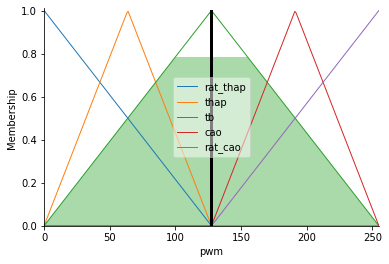

In [14]:
rule1 = ctrl.Rule(setpoint['short']&sensor['v'], pwm['rat_thap'])
rule2 = ctrl.Rule(setpoint['short']&sensor['s'], pwm['thap'])
rule3 = ctrl.Rule(setpoint['short']&sensor['m'], pwm['thap'])
rule4 = ctrl.Rule(setpoint['short']&sensor['h'], pwm['tb'])
rule5 = ctrl.Rule(setpoint['short']&sensor['y'], pwm['tb'])
rule6 = ctrl.Rule(setpoint['medium']&sensor['v'], pwm['rat_thap'])
rule7 = ctrl.Rule(setpoint['medium']&sensor['s'], pwm['thap'])
rule8 = ctrl.Rule(setpoint['medium']&sensor['m'], pwm['thap'])
rule9 = ctrl.Rule(setpoint['medium']&sensor['h'], pwm['tb'])
rule10 = ctrl.Rule(setpoint['medium']&sensor['y'], pwm['tb'])
rule11 = ctrl.Rule(setpoint['high']&sensor['v'], pwm['cao'])
rule12 = ctrl.Rule(setpoint['high']&sensor['s'], pwm['cao'])
rule13 = ctrl.Rule(setpoint['high']&sensor['m'], pwm['rat_cao'])
rule14 = ctrl.Rule(setpoint['high']&sensor['h'], pwm['rat_cao'])
rule15 = ctrl.Rule(setpoint['high']&sensor['y'], pwm['rat_cao'])
pwm_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
pwm_simulation = ctrl.ControlSystemSimulation(pwm_control)
pwm_simulation.input['setpoint'] = 20
pwm_simulation.input['sensor'] = 50
pwm_simulation.compute()
print(pwm_simulation.output['pwm'])
pwm.view(sim=pwm_simulation)